In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
path_to_data = "./sorted_image_list/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./sorted_image_list/normal_bladder',
 './sorted_image_list/overactive_bladder']

In [4]:
bladder_dict = {}
for img_dir in img_dirs:
    bladder_type = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    bladder_dict[bladder_type] = file_list
bladder_dict

{'normal_bladder': ['./sorted_image_list/normal_bladder\\nb_1.jpg',
  './sorted_image_list/normal_bladder\\nb_10.jpg',
  './sorted_image_list/normal_bladder\\nb_11.jpg',
  './sorted_image_list/normal_bladder\\nb_12.jpg',
  './sorted_image_list/normal_bladder\\nb_13.jpg',
  './sorted_image_list/normal_bladder\\nb_14.jpg',
  './sorted_image_list/normal_bladder\\nb_15.jpg',
  './sorted_image_list/normal_bladder\\nb_16.jpg',
  './sorted_image_list/normal_bladder\\nb_17.jpg',
  './sorted_image_list/normal_bladder\\nb_18.jpg',
  './sorted_image_list/normal_bladder\\nb_19.jpg',
  './sorted_image_list/normal_bladder\\nb_2.jpg',
  './sorted_image_list/normal_bladder\\nb_20.jpg',
  './sorted_image_list/normal_bladder\\nb_21.jpg',
  './sorted_image_list/normal_bladder\\nb_22.jpg',
  './sorted_image_list/normal_bladder\\nb_3.jpg',
  './sorted_image_list/normal_bladder\\nb_4.jpg',
  './sorted_image_list/normal_bladder\\nb_5.jpg',
  './sorted_image_list/normal_bladder\\nb_6.jpg',
  './sorted_image_l

In [20]:
class_dict = {}
count = 0
for bladder_type in bladder_dict.keys():
    class_dict[bladder_type] = count
    count = count + 1
class_dict

{'normal_bladder': 0, 'overactive_bladder': 1}

In [82]:
X, y = [], []
#j=0
for bladder_type, training_files in bladder_dict.items():
    print(bladder_type)
    for training_image in training_files:
        img = cv2.imread(training_image)        
        resized_img = cv2.resize(img, (128, 128))        
        resized_img = resized_img/255
        X.append(resized_img)
        #print(resized_img.shape)
        y.append(class_dict[bladder_type])
        #print(y)
        #X[j] = resized_img
        #y[j] = class_dict[bladder_type]
        #j+=1
X = np.array(X)       
y = np.array(y)

normal_bladder
overactive_bladder


In [83]:
len(X)

44

In [84]:
X[0].shape

(128, 128, 3)

In [85]:
len(y)

44

In [87]:
X.shape

(44, 128, 128, 3)

In [88]:
128*128*3

49152

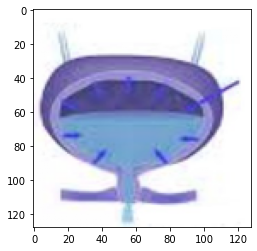

In [89]:
plt.imshow(X[41])

In [28]:
#X = np.array(X).reshape(len(X),49152).astype(float)
#X.shape

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

33
11
33
11


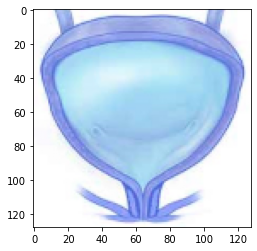

In [91]:
plt.imshow(X_train[5])

In [92]:
y_train[:5]

array([0, 1, 0, 1, 0])

In [93]:
y_test[:5]

array([1, 1, 1, 0, 0])

In [94]:
classes = ["normal","overactive"]

In [95]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

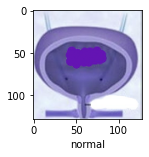

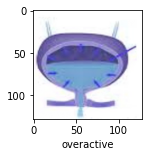

In [96]:
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

In [97]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [101]:
ann = models.Sequential([
        layers.Flatten(input_shape=(128,128,3)),
        layers.Dense(300, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(2, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 31ms/step - loss: 1.4252 - accuracy: 0.4545
Epoch 2/5
2/2 [==============================] - 0s 33ms/step - loss: 42.2159 - accuracy: 0.5455
Epoch 3/5
2/2 [==============================] - 0s 32ms/step - loss: 1.6683 - accuracy: 0.5455
Epoch 4/5
2/2 [==============================] - 0s 30ms/step - loss: 2.3779 - accuracy: 0.5758
Epoch 5/5
2/2 [==============================] - 0s 31ms/step - loss: 1.1198 - accuracy: 0.5758


In [102]:
ann.evaluate(X_test,y_test)

1/1 [==============================] - 0s 71ms/step - loss: 1.4256 - accuracy: 0.2727


[1.425552487373352, 0.27272728085517883]

In [103]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.27      1.00      0.43         3
           1       0.00      0.00      0.00         8

    accuracy                           0.27        11
   macro avg       0.14      0.50      0.21        11
weighted avg       0.07      0.27      0.12        11



In [104]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [105]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 18ms/step - loss: 0.6736 - accuracy: 0.4545
Epoch 2/10
2/2 [==============================] - 0s 20ms/step - loss: 10.9864 - accuracy: 0.5758
Epoch 3/10
2/2 [==============================] - 0s 18ms/step - loss: 1.5346 - accuracy: 0.4242
Epoch 4/10
2/2 [==============================] - 0s 19ms/step - loss: 1.9788 - accuracy: 0.5758
Epoch 5/10
2/2 [==============================] - 0s 17ms/step - loss: 2.8408 - accuracy: 0.5758
Epoch 6/10
2/2 [==============================] - 0s 18ms/step - loss: 0.8062 - accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 0s 18ms/step - loss: 2.0932 - accuracy: 0.4242
Epoch 8/10
2/2 [==============================] - 0s 20ms/step - loss: 1.5198 - accuracy: 0.4242
Epoch 9/10
2/2 [==============================] - 0s 19ms/step - loss: 0.7639 - accuracy: 0.4545
Epoch 10/10
2/2 [==============================] - 0s 18ms/step - loss: 0.8169 - accuracy: 0.6061


In [107]:
cnn.evaluate(X_test,y_test)

1/1 [==============================] - 0s 91ms/step - loss: 1.9956 - accuracy: 0.2727


[1.9955919981002808, 0.27272728085517883]

In [108]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[0.9192609 , 0.08073904],
       [0.9229745 , 0.07702553],
       [0.9462494 , 0.05375061],
       [0.91985756, 0.08014241],
       [0.912764  , 0.08723604]], dtype=float32)

In [109]:
y_test[:5]

array([1, 1, 1, 0, 0])

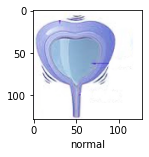

In [110]:
plot_sample(X_test, y_test,3)